<a href="https://colab.research.google.com/github/thegit-69/star-summit/blob/main/SVM_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9537 entries, 0 to 9536
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   session_id           9537 non-null   object 
 1   network_packet_size  9537 non-null   int64  
 2   protocol_type        9537 non-null   object 
 3   login_attempts       9537 non-null   int64  
 4   session_duration     9537 non-null   float64
 5   encryption_used      7571 non-null   object 
 6   ip_reputation_score  9537 non-null   float64
 7   failed_logins        9537 non-null   int64  
 8   browser_type         9537 non-null   object 
 9   unusual_time_access  9537 non-null   int64  
 10  attack_detected      9537 non-null   int64  
dtypes: float64(2), int64(5), object(4)
memory usage: 819.7+ KB
None

First 5 Rows:
  session_id  network_packet_size protocol_type  login_attempts  \
0  SID_00001                  599           TCP               4   
1  SID_

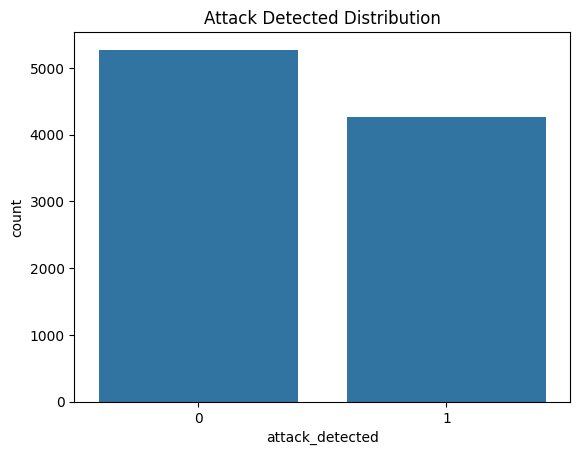

Model Accuracy: 88.05%

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.98      0.90      1042
           1       0.96      0.77      0.85       866

    accuracy                           0.88      1908
   macro avg       0.90      0.87      0.88      1908
weighted avg       0.89      0.88      0.88      1908



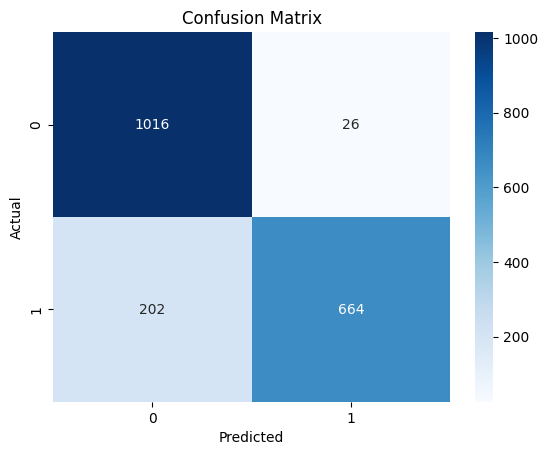


Feature Importance:
               Feature  Importance
1        protocol_type         1.0
0  network_packet_size         1.0
2       login_attempts         1.0
3     session_duration         1.0
4      encryption_used         1.0
5  ip_reputation_score         1.0
6        failed_logins         1.0
8  unusual_time_access         1.0
7         browser_type         1.0


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Load dataset
file_path = "/content/cybersecurity_intrusion_data.csv"
df = pd.read_csv(file_path)

# Display basic dataset info
print("Dataset Overview:")
print(df.info())
print("\nFirst 5 Rows:")
print(df.head())

# Drop non-relevant columns
df.drop(columns=["session_id"], inplace=True)

# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Encode categorical variables
categorical_cols = ["protocol_type", "encryption_used", "browser_type"]
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

# Visualize class distribution
sns.countplot(x=df["attack_detected"])
plt.title("Attack Detected Distribution")
plt.show()

# Define features and target
X = df.drop(columns=["attack_detected"])
y = df["attack_detected"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train SVM model
model = SVC(kernel='rbf', random_state=42)
model.fit(X_train, y_train)

# Predict and evaluate
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred) * 100
print(f"Model Accuracy: {accuracy:.2f}%")

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

# Feature Importance (SVM doesn't provide this directly, so using mean std deviation)
feature_importance = np.std(X_train, axis=0)
feature_importance_df = pd.DataFrame({'Feature': df.drop(columns=['attack_detected']).columns, 'Importance': feature_importance})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print("\nFeature Importance:")
print(feature_importance_df)
